<a href="https://colab.research.google.com/github/Taazkir/ML-predicting-house-prices-philadelphia/blob/main/Predicting_House_Prices_in_Philadelphia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# https://medium.com/@GaussEuler/philadelphia-housing-data-part-i-data-analysis-fe45415554a9



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('opa_properties_public.csv', low_memory=False)
print(df.shape)
print(df.columns)


(582933, 82)
Index(['the_geom', 'the_geom_webmercator', 'assessment_date', 'basements',
       'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade',

In [91]:
# Drop columns that are not valuable
drop_column_list = ['the_geom', 'assessment_date','beginning_point', 'book_and_page',
                    'category_code_description', 'cross_reference', 'house_number',
                    'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
                    'mailing_city_state', 'mailing_street', 'market_value_date',
                    'the_geom_webmercator','other_building','owner_1', 'owner_2',
                    'parcel_number', 'recording_date', 'sale_date', 'registry_number',
                    'sale_price', 'unit', 'objectid','building_code', 'census_tract',
                    'date_exterior_condition', 'year_built_estimate', 'house_extension',
                    'mailing_zip', 'sewer', 'site_type','state_code', 'street_designation',
                    'street_name', 'street_direction', 'geographic_ward', 'pin',
                    'unfinished', 'utility', 'suffix']

data = df.drop(drop_column_list, axis = 1)

# Drop market values that are zero or missing
data = data.dropna(subset=["market_value"])
data = data.drop(data[data.market_value == 0].index)
data


,basements,building_code_description,category_code,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,...,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,building_code_new,building_code_description_new,lat,lng
0,NaN,VACANT LAND RESIDE < ACRE,6,NaN,53.0,0.0,96100.0,NaN,NaN,16.0,...,NaN,NaN,I,NaN,19146.0,RSA5,NaN,NaN,39.934458,-75.190139
1,NaN,VACANT LAND COMMER < ACRE,6,NaN,77.0,0.0,0.0,NaN,NaN,16.0,...,NaN,NaN,I,NaN,19132.0,CMX1,NaN,NaN,39.997167,-75.177860
2,NaN,ROW B/OFF-STR 2 STY STONE,3,NaN,79.0,80000.0,0.0,NaN,NaN,20.0,...,2247.0,NaN,I,1950.0,19145.0,CMX1,820,ROW MIXED-COM/RES-BLT AS RES,39.912470,-75.175407
3,NaN,VACANT LAND RESIDE < ACRE,6,NaN,57.0,0.0,0.0,NaN,NaN,14.0,...,NaN,NaN,I,NaN,19132.0,RSA5,NaN,NaN,39.992003,-75.184334
4,NaN,MISC FUNERAL HOME MASONRY,4,NaN,90.0,0.0,0.0,NaN,NaN,20.0,...,4425.0,NaN,A,1920.0,19130.0,RM1,246,FUNERAL HOME,39.963831,-75.170150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582928,NaN,ROW 3 STY MASONRY,13,NaN,NaN,0.0,47000.0,NaN,NaN,NaN,...,NaN,NaN,E,NaN,19125.0,RSA5,NaN,NaN,39.980618,-75.131672
582929,NaN,VACANT LAND RESIDE < ACRE,6,NaN,45.0,0.0,0.0,NaN,NaN,14.0,...,NaN,NaN,I,NaN,19140.0,RSA5,NaN,NaN,40.019182,-75.160005
582930,NaN,ROW 2 STY MASONRY,1,NaN,50.0,80000.0,0.0,4.0,0.0,15.0,...,780.0,NaN,I,1925.0,19146.0,RSA5,22,ROW TYPICAL,39.944642,-75.176396
582931,C,ROW 3 STY MASONRY,1,N,69.0,0.0,0.0,4.0,0.0,16.0,...,1230.0,B,I,1915.0,19121.0,RSA5,22,ROW TYPICAL,39.978833,-75.168987


In [92]:
# Drop proprties that are not strictly residential houses

# Deleting 'Mixed Use'
data=data.drop(data[data.category_code == 3].index)
# Deleting ‘Commercial’
data=data.drop(data[data.category_code == 4].index)
# Deleting ‘Industrial
data=data.drop(data[data.category_code == 5].index)
# Deleting ‘Vacant Land’
data=data.drop(data[data.category_code == 6].index)
# Deleting 'Garage Commarcial'
data=data.drop(data[data.category_code == 7].index)
# Deleting 'Garage Residential'
data=data.drop(data[data.category_code == 8].index)
# Deleting 'Hotel'
data=data.drop(data[data.category_code == 9].index)
# Deleting 'Office'
data=data.drop(data[data.category_code == 10].index)
# Deleting 'Special Purpose'
data=data.drop(data[data.category_code == 11].index)
# Deleting 'Vacant land non resdidential'
data=data.drop(data[data.category_code == 12].index)
# Deleting 'Vacant land resdidential'
data=data.drop(data[data.category_code == 13].index)
# Deleting 'Apartment > 4 units'
data=data.drop(data[data.category_code == 14].index)
# Deleting 'Retail'
data=data.drop(data[data.category_code == 15].index)
# Deleting 'Blank descriptions'
data=data.drop(data[data.category_code == 16].index)

data

,basements,building_code_description,category_code,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,...,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,building_code_new,building_code_description_new,lat,lng
34,NaN,ROW CONV/APT 3 STY MASON,2,NaN,100.0,329760.0,82440.0,4.0,0.0,16.0,...,2540.0,NaN,I,1890.0,19121.0,RM1,22,ROW TYPICAL,39.979887,-75.160682
40,D,ROW CONV/APT 2 STY MASON,2,NaN,78.0,311700.0,0.0,3.0,0.0,16.0,...,1280.0,H,I,1935.0,19130.0,RSA5,24,ROW PORCH FRONT,39.971723,-75.181206
43,NaN,ROW 2 STY MASONRY,1,NaN,44.0,32000.0,8000.0,4.0,0.0,14.0,...,840.0,NaN,I,1915.0,19132.0,RSA5,22,ROW TYPICAL,39.991279,-75.174171
74,D,PRIV GAR 1 STY MASONRY,1,NaN,64.0,0.0,0.0,4.0,0.0,14.0,...,258.0,H,I,1899.0,19125.0,RSA5,NaN,NaN,39.977132,-75.127125
82,NaN,ROW CONV/APT 3 STY MASON,2,NaN,71.0,145280.0,36320.0,4.0,0.0,15.0,...,2550.0,NaN,I,1920.0,19133.0,CMX2,22,ROW TYPICAL,39.992365,-75.151271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582925,NaN,VACANT LAND INDUST ACRE+,1,NaN,NaN,258400.0,0.0,NaN,NaN,NaN,...,NaN,NaN,I,NaN,19125.0,ICMX,NaN,NaN,39.986442,-75.121220
582926,NaN,VACANT LAND INDUST ACRE+,1,NaN,NaN,250325.0,0.0,NaN,NaN,NaN,...,NaN,NaN,I,NaN,19125.0,ICMX,NaN,NaN,39.986442,-75.121220
582930,NaN,ROW 2 STY MASONRY,1,NaN,50.0,80000.0,0.0,4.0,0.0,15.0,...,780.0,NaN,I,1925.0,19146.0,RSA5,22,ROW TYPICAL,39.944642,-75.176396
582931,C,ROW 3 STY MASONRY,1,N,69.0,0.0,0.0,4.0,0.0,16.0,...,1230.0,B,I,1915.0,19121.0,RSA5,22,ROW TYPICAL,39.978833,-75.168987


In [93]:
# Handling 'basements'
data.basements.value_counts(dropna=False)

NaN    173727
D      107780
F       64136
H       57384
C       33972
A       28125
0       10782
E       10083
J        7570
G        4360
B        3137
I        2054
1         657
4          96
2          20
3           8
Name: basements, dtype: int64

In [94]:
# Basement Codes

# D = Full – Unknown Finish
# F = Partial - Semi-Finished
# H = Partial - Unknown Finish
# C = Full - Unfinished
# A = Full - Finished
# J = Unknown Size - Unfinished
# 0 = No Basement
# E = Partial - Finished
# I = Unknown Size - Finished
# G = Partial - Unfinished
# B = Full - Semi-Finished

# Replacing missing basement with "L" and zero (no basement) with "K"

data.loc[:, "basements"] = data.loc[:, "basements"].fillna('L')
data.loc[:, "basements"] = data['basements'].replace('0', 'K')

In [95]:
# Handling 'central_air'
data.central_air.value_counts(dropna=False)

NaN    210404
N      164267
Y      127993
0        1082
1         145
Name: central_air, dtype: int64

In [96]:
# Replacing '0' with 'N'
data.loc[:, "central_air"] = data['central_air'].replace('0', 'N')
# Replacing "NaN" with 'N'
data.loc[:, "central_air"] = data['central_air'].fillna('N')
# Replacing '1' with 'Y'
data.loc[:, "central_air"] = data['central_air'].replace('1', 'Y')

In [97]:
# Handling 'exterior_condition'
data.exterior_condition.value_counts(dropna=False)

4.0    392834
3.0     48507
5.0     24331
1.0     16186
2.0     12542
7.0      3507
NaN      3257
6.0      2665
0.0        62
Name: exterior_condition, dtype: int64

(-0.5, 7.5, 0.0, 800000.0)

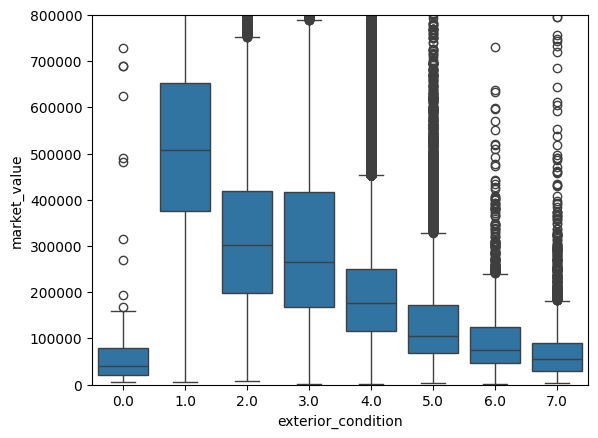

In [99]:
# Box plot: 'market_value' vs. 'exterior_condition'
condition_df = pd.concat([data['market_value'],
                         data['exterior_condition']], axis=1)

box_fig = sns.boxplot(x='exterior_condition', y="market_value", data=condition_df)
box_fig.axis(ymin=0, ymax=800000)

In [ ]:
# Exterior Condition



In [100]:
# Drop missing values

# Drop missing depth
data = data.dropna(subset=["depth", "central_air", "fuel", "fireplaces"])
data = data.drop(data[data.depth == 0].index)
data

,basements,building_code_description,category_code,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,...,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,building_code_new,building_code_description_new,lat,lng
205,D,ROW CONV/APT 3 STY MASON,2,Y,101.0,53100.0,17700.0,3.0,0.0,20.0,...,2775.0,A,I,1920.0,19130.0,RM1,22,ROW TYPICAL,39.965725,-75.169316
543,E,VACANT LAND RESIDE < ACRE,1,Y,105.0,0.0,0.0,1.0,0.0,68.0,...,3070.0,A,I,2023.0,19114.0,RSD1,10,COLONIAL,40.057764,-74.989302
941,C,ROW 2 STY MASONRY,1,N,54.0,0.0,0.0,4.0,0.0,14.0,...,896.0,A,I,1920.0,19145.0,RM1,22,ROW TYPICAL,39.927839,-75.184498
945,A,ROW 3 STY MASONRY,1,Y,48.0,440080.0,0.0,1.0,0.0,14.0,...,1594.0,A,I,2019.0,19121.0,RSA5,25,ROW MODERN,39.974354,-75.164303
951,A,ROW W/GAR 3 STY FRAME,1,Y,57.0,513600.0,0.0,1.0,0.0,17.0,...,2508.0,A,I,2015.0,19122.0,RSA5,25,ROW MODERN,39.971949,-75.137750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582902,K,HSE WORSHIP ALL 3 STY MAS,1,Y,67.0,0.0,0.0,1.0,0.0,68.0,...,1498.0,A,I,2022.0,19119.0,CMX2,40,CONDO NON CONFORMING,40.051039,-75.185491
582903,C,ROW CONV/APT 3 STY MASON,1,Y,100.0,0.0,0.0,2.0,0.0,18.0,...,807.0,A,I,1915.0,19121.0,RM1,21,ROW OLD STYLE,39.986004,-75.164599
582904,C,ROW CONV/APT 3 STY MASON,1,Y,100.0,0.0,0.0,2.0,0.0,18.0,...,1053.0,A,I,1915.0,19121.0,RM1,21,ROW OLD STYLE,39.986004,-75.164599
582905,C,ROW CONV/APT 3 STY MASON,1,Y,100.0,0.0,0.0,2.0,0.0,18.0,...,1045.0,A,I,1915.0,19121.0,RM1,21,ROW OLD STYLE,39.986004,-75.164599
